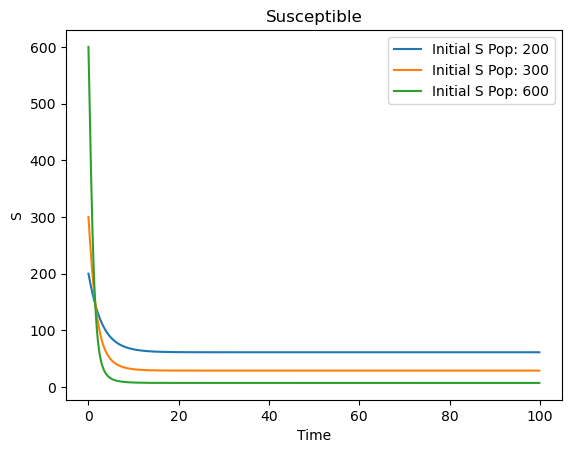

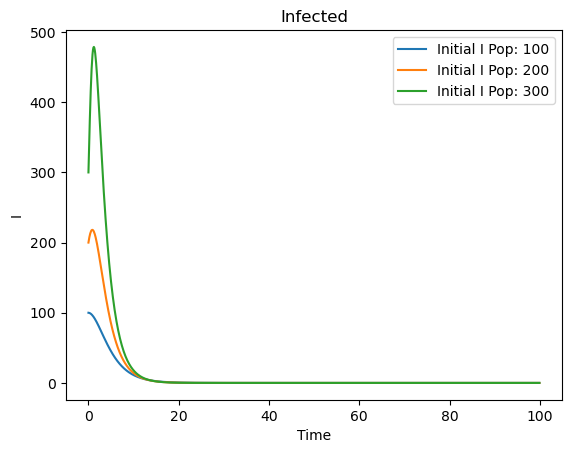

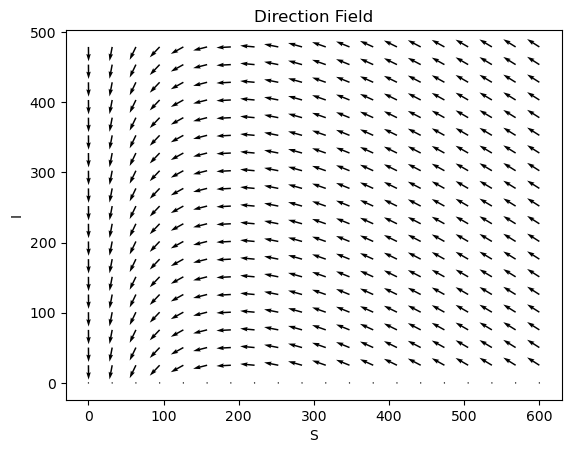

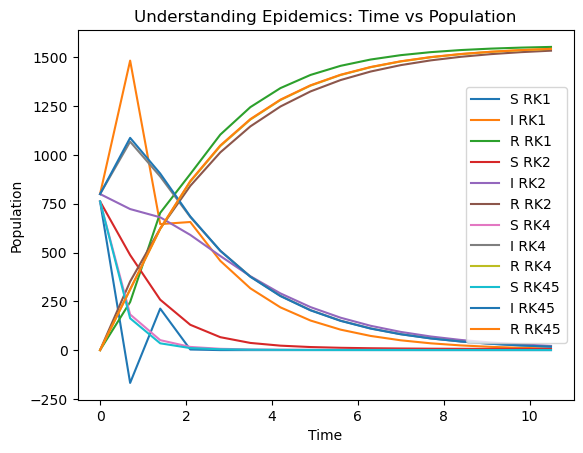

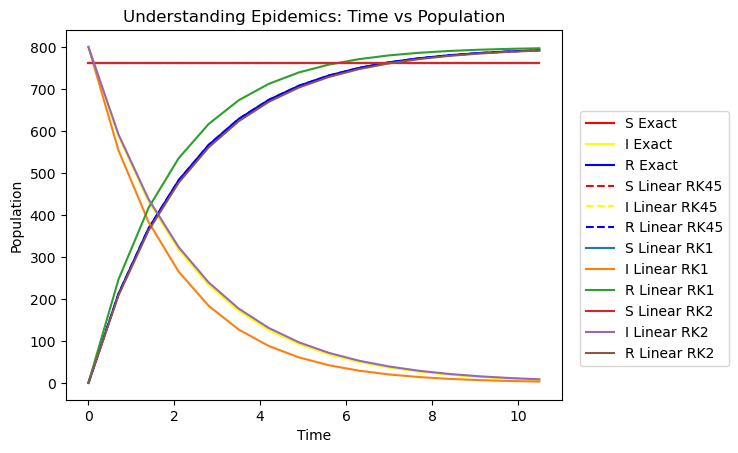

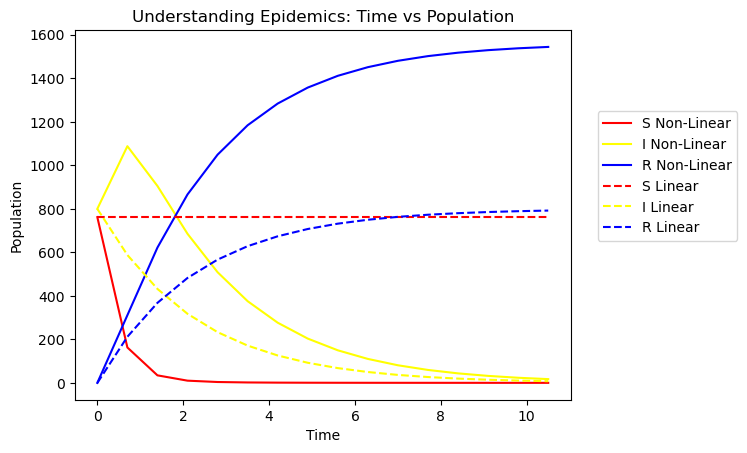

In [1]:
#%%
#Goal: A model to describe the spread of a disease in a population.

#Useful python commands: sympy.dsolve, sympy.lambdify, plot.subplots, for loop, 
#numpy.arange, numpy.linspace, len, plot.scatter,..., solve_ivp, plot.quiver, 
#numpy.meshgrid

#rate of change in no. of susceptibles= -rate of susceptibles infected
#rate of change in no. of infectives= rate of susceptibles infected - rate of infectives recovered
#rate of change in no. of recovered= rate of infectives recovered

#We ignore births and deaths in this model and assume the disease is spread by contact.

#%%
#Q1
#Import Libraries
import numpy as np
import sympy as sp
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

#Define the given system in the form of lambdify generated function
b=0.00218
g=0.44
arr=lambda t,y:[(-b*y[0]*y[1]),((b*y[0]*y[1])-g*y[1])]

#Input the interval of integration
interval=[0,100]
h=0.1

#Create an array for various initial conditions
init=[[200,100],[300,200],[600,300]]

#Define the discrete-time space
t_space=np.arange(interval[0],interval[1],h)

#Iterating over the initial conditions
for i in init:
    sol=solve_ivp(arr,interval,i,method="RK45",t_eval=t_space)
    plt.plot(sol.t,sol.y[0],label="Initial S Pop: "+str(i[0]))
plt.title("Susceptible")
plt.xlabel("Time")
plt.ylabel("S")
plt.legend()
plt.show()

for i in init:
    sol=solve_ivp(arr,interval,i,method="RK45",t_eval=t_space)
    plt.plot(sol.t,sol.y[1],label="Initial I Pop: "+str(i[1]))
plt.title("Infected")
plt.xlabel("Time")
plt.ylabel("I")
plt.legend()
plt.show()

#Define a function containing the system of differential equations

def sys_de(t,y,b,g):
    S,I=y
    dS=-b*S*I
    dI=b*S*I-g*I
    return [dS,dI]

#Find the maximum value of the plotted trajectories

max_S=max(sol.y[0])
max_I=max(sol.y[1]) 

#Create a discrete space for x and y 

S_val=np.linspace(0,max_S,20)
I_val=np.linspace(0,max_I,20)

#Create a meshgrid 

S,I=np.meshgrid(S_val,I_val)

#Find the slopes of functions

slopes=np.array(sys_de(0,[S,I],b,g))

#Normalize the obtained slope points

mag=(slopes[0]**2+slopes[1]**2 +10**-3)**(1/2)
slopes=slopes/mag + (10**-2)

#Plot the direction field

plt.quiver(S,I,slopes[0],slopes[1],angles="xy")
plt.xlabel("S")
plt.ylabel("I")
plt.title("Direction Field")
plt.show()
# %%
#Q2
#import libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
import sympy as sp

#Define the system of differential equations
def sys_de(t,y,b,g):
    S,I,R=y
    dS=-b*S*I
    dI=b*S*I-g*I
    dR=g*I
    return [dS,dI,dR]

#Solution using Euler's method
def rk1(sys,t,y,b,g,h):
    sol=np.zeros((len(t),len(y)))
    sol[0]=y
    for i in range(1,len(t)):
        sol[i]=sol[i-1]+h*np.array(sys(t[i-1],sol[i-1],b,g))
    return sol

#Solution using RK-2 method

def rk2(sys,t,y,b,g,h):
    sol=np.zeros((len(t),len(y)))
    sol[0]=y
    for i in range(1,len(t)):
        k1=np.array(sys(t[i-1],sol[i-1],b,g))
        k2=np.array(sys(t[i-1]+h,sol[i-1]+h*k1,b,g))
        sol[i]=sol[i-1]+h*(k1+k2)/2
    return sol

#Solution using RK-4 method

def rk4(sys,t,y,b,g,h):
    sol=np.zeros((len(t),len(y)))
    sol[0]=y
    for i in range(1,len(t)):
        k1=np.array(sys(t[i-1],sol[i-1],b,g))
        k2=np.array(sys(t[i-1]+h/2,sol[i-1]+h*k1/2,b,g))
        k3=np.array(sys(t[i-1]+h/2,sol[i-1]+h*k2/2,b,g))
        k4=np.array(sys(t[i-1]+h,sol[i-1]+h*k3,b,g))
        sol[i]=sol[i-1]+h/6*(k1+2*k2+2*k3+k4)
    return sol

#Defining variables and calling functions
y,t=sp.symbols("y t")
b=0.00218
g=0.44
y=[762,800,0]
interval=[0,10.5]
h=0.7
t_space=np.arange(interval[0],interval[1],h)
sol_rk1=rk1(sys_de,t_space,y,b,g,h)
sol_rk2=rk2(sys_de,t_space,y,b,g,h)
sol_rk4=rk4(sys_de,t_space,y,b,g,h)

#Solution using RK-45 method

arr=lambda t,y:[(-b*y[0]*y[1]),((b*y[0]*y[1])-g*y[1]),(g*y[1])]
sol_rk45=solve_ivp(arr,interval,y,method="RK45",t_eval=t_space)

plt.plot(t_space,sol_rk1[:,0],label="S RK1")
plt.plot(t_space,sol_rk1[:,1],label="I RK1")
plt.plot(t_space,sol_rk1[:,2],label="R RK1")
plt.plot(t_space,sol_rk2[:,0],label="S RK2")
plt.plot(t_space,sol_rk2[:,1],label="I RK2")
plt.plot(t_space,sol_rk2[:,2],label="R RK2")
plt.plot(t_space,sol_rk4[:,0],label="S RK4")
plt.plot(t_space,sol_rk4[:,1],label="I RK4")
plt.plot(t_space,sol_rk4[:,2],label="R RK4")
plt.plot(sol_rk45.t,sol_rk45.y[0],label="S RK45")
plt.plot(sol_rk45.t,sol_rk45.y[1],label="I RK45")
plt.plot(sol_rk45.t,sol_rk45.y[2],label="R RK45")
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Understanding Epidemics: Time vs Population")
plt.legend()
plt.show()

# %%
#Q3
#import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import sympy as sp
sp.init_printing()

#Defining variables
y=[762,800,0]
S=sp.Function("S")
I=sp.Function("I")
R=sp.Function("R")
t,g=sp.symbols("t g")
b=0

dS=sp.Eq(S(t).diff(t),-b*S(t)*I(t))
dI=sp.Eq(I(t).diff(t),b*S(t)*I(t)-g*I(t))
dR=sp.Eq(R(t).diff(t),g*I(t))
sol=sp.dsolve([dS,dI,dR])
sol

#%%
sol1=sp.dsolve([dS,dI,dR],ics={S(0):762,I(0):800,R(0):0})
sol1
#%%
g=0.44

dS=sp.Eq(S(t).diff(t),-b*S(t)*I(t))
dI=sp.Eq(I(t).diff(t),b*S(t)*I(t)-g*I(t))
dR=sp.Eq(R(t).diff(t),g*I(t))
sol=sp.dsolve([dS,dI,dR])
sol
#%%
sol1=sp.dsolve([dS,dI,dR],ics={S(0):762,I(0):800,R(0):0})
sol1
#%%
#Q4
#import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import sympy as sp

#Defining variables
interval=[0,10.5]
h=0.7
t_space=np.arange(interval[0],interval[1],h)
b=0
g=0.44
y=[762,800,0]
t=sp.Symbol("t")

#Exact Solution

dS=sp.Eq(S(t).diff(t),-b*S(t)*I(t))
dI=sp.Eq(I(t).diff(t),b*S(t)*I(t)-g*I(t))
dR=sp.Eq(R(t).diff(t),g*I(t))

sol1=sp.dsolve([dS,dI,dR],[S(t),I(t),R(t)],ics={S(0):762,I(0):800,R(0):0})

sol=[[],[],[]]
for i in t_space:
    sol[0].append(sol1[0].rhs.subs({t:i}))
    sol[1].append(sol1[1].rhs.subs({t:i}))
    sol[2].append(sol1[2].rhs.subs({t:i}))

plt.plot(t_space,sol[0],color='red',label="S Exact")
plt.plot(t_space,sol[1],color='yellow',label="I Exact")
plt.plot(t_space,sol[2],color='blue',label="R Exact")

#Solution using RK45 method and Plot

arr=lambda t,y:[(-b*y[0]*y[1]),((b*y[0]*y[1])-g*y[1]),(g*y[1])]
sol_l=solve_ivp(arr,interval,y,method="RK45",t_eval=t_space)

plt.plot(sol_l.t,sol_l.y[0],color='red',ls='--',label="S Linear RK45")
plt.plot(sol_l.t,sol_l.y[1],color='yellow',ls='--',label="I Linear RK45")
plt.plot(sol_l.t,sol_l.y[2],color='blue',ls='--',label="R Linear RK45")

#Define the system of differential equations
def sys_de(t,y,b,g):
    S,I,R=y
    dS=-b*S*I
    dI=b*S*I-g*I
    dR=g*I
    return [dS,dI,dR]

#Solution using Euler's method
def rk1(sys,t,y,b,g,h):
    sol=np.zeros((len(t),len(y)))
    sol[0]=y
    for i in range(1,len(t)):
        sol[i]=sol[i-1]+h*np.array(sys(t[i-1],sol[i-1],b,g))
    return sol

#Solution using RK-2 method

def rk2(sys,t,y,b,g,h):
    sol=np.zeros((len(t),len(y)))
    sol[0]=y
    for i in range(1,len(t)):
        k1=np.array(sys(t[i-1],sol[i-1],b,g))
        k2=np.array(sys(t[i-1]+h,sol[i-1]+h*k1,b,g))
        sol[i]=sol[i-1]+h*(k1+k2)/2
    return sol

#Calling the functions for RK-1 and RK-2 methods

sol_rk1=rk1(sys_de,t_space,y,b,g,h)
sol_rk2=rk2(sys_de,t_space,y,b,g,h)

#Plotting the graphs

plt.plot(t_space,sol_rk1[:,0],label="S Linear RK1")
plt.plot(t_space,sol_rk1[:,1],label="I Linear RK1")
plt.plot(t_space,sol_rk1[:,2],label="R Linear RK1")
plt.plot(t_space,sol_rk2[:,0],label="S Linear RK2")
plt.plot(t_space,sol_rk2[:,1],label="I Linear RK2")
plt.plot(t_space,sol_rk2[:,2],label="R Linear RK2")

plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Understanding Epidemics: Time vs Population")
plt.legend(bbox_to_anchor=(1.35, 0.8),loc=1)
plt.show()
#%%
#Q5
#import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import sympy as sp

#Defining variables
interval=[0,10.5]
h=0.7
t_space=np.arange(interval[0],interval[1],h)
b=0.00218
g=0.44
y=[762,800,0]

# Non-Linear Solution using RK-45 method and Plot

arr=lambda t,y:[(-b*y[0]*y[1]),((b*y[0]*y[1])-g*y[1]),(g*y[1])]
sol_nl=solve_ivp(arr,interval,y,method="RK45",t_eval=t_space)

plt.plot(sol_l.t,sol_nl.y[0],color='red',label="S Non-Linear")
plt.plot(sol_l.t,sol_nl.y[1],color='yellow',label="I Non-Linear")
plt.plot(sol_l.t,sol_nl.y[2],color='blue',label="R Non-Linear")

b=0

#Linear Solution using RK-45 method and Plot

arr=lambda t,y:[(-b*y[0]*y[1]),((b*y[0]*y[1])-g*y[1]),(g*y[1])]
sol_l=solve_ivp(arr,interval,y,method="RK45",t_eval=t_space)

plt.plot(sol_l.t,sol_l.y[0],color='red',ls='--',label="S Linear")
plt.plot(sol_l.t,sol_l.y[1],color='yellow',ls='--',label="I Linear")
plt.plot(sol_l.t,sol_l.y[2],color='blue',ls='--',label="R Linear")

plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Understanding Epidemics: Time vs Population")
plt.legend(bbox_to_anchor=(1.35, 0.8),loc=1)
plt.show()
#%%
